# Machine Learning/Deep Learning

## In this project, you will explore basic machine learning (ML) and deep learning (DL) techniques to predict the number of Olympic medals a country will win. The dataset provided includes features such as GDP, population, and sports index, along with the actual number of medals won. You will build and evaluate different models to understand which factors are most influential in predicting Olympic success.

In [3]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score)

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

2024-08-17 12:39:37.207510: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
#Load the dataset
data = pd.read_csv('OlympicMedals.csv')
data.head(10)

,iso,ioc,name,continent,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total,gold,silver,bronze
0,ARG,ARG,Argentina,South America,45376763,383066977654,19.597142,9.324537,19.597142,9.324537,3,0,1,2
1,ARM,ARM,Armenia,Asia,2963234,12645459214,19.681457,13.497324,19.681457,13.497324,4,0,2,2
2,AUS,AUS,Australia,Oceania,25687041,1330900925057,31.170099,11.073845,31.170099,11.073845,46,17,7,22
3,AUT,AUT,Austria,Europe,8917205,428965397959,12.212139,15.923033,12.212139,15.923033,7,1,1,5
4,AZE,AZE,Azerbaijan,Europe,10110116,42607176471,18.213838,13.103344,18.213838,13.103344,7,0,3,4
5,BEL,BEL,Belgium,Europe,11555997,515332499628,15.006300,14.313762,15.006300,14.313762,7,3,1,3
6,BFA,BUR,Burkina Faso,Africa,20903278,17369059295,14.909787,12.936581,14.909787,12.936581,1,0,0,1
7,BGR,BUL,Bulgaria,Europe,6927288,69105101090,22.684033,19.656028,22.684033,19.656028,6,3,1,2
8,BHR,BRN,Bahrain,Asia,1701583,38474521277,14.422561,13.931504,14.422561,13.931504,1,0,1,0
9,BHS,BAH,Bahamas,North America,393248,11250000000,18.089184,9.630174,18.089184,9.630174,2,2,0,0


In [7]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Step 1: Data Preprocessing

In [10]:
#Check for Missing Values
print(data.isnull().sum())

iso               0
ioc               0
name              0
continent         0
population        0
gdp               0
olympics_index    0
sports_index      0
olympicsIndex     0
sportsIndex       0
total             0
gold              0
silver            0
bronze            0
dtype: int64


### Note: Missing values were handled manually.

In [13]:
#Drop Irrelevant/Duplicate Columns
data = data.drop(columns = ['iso', 'ioc', 'name', 'continent', 'olympicsIndex', 'sportsIndex'])
data.head()

,population,gdp,olympics_index,sports_index,total,gold,silver,bronze
0,45376763,383066977654,19.597142,9.324537,3,0,1,2
1,2963234,12645459214,19.681457,13.497324,4,0,2,2
2,25687041,1330900925057,31.170099,11.073845,46,17,7,22
3,8917205,428965397959,12.212139,15.923033,7,1,1,5
4,10110116,42607176471,18.213838,13.103344,7,0,3,4


In [15]:
#Extract features and target
x = data.drop(columns = ['total'])  
y = data['total'] 

#Standardizing Data
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [17]:
#Splitting the Dataset Into Training and Test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Step 2: Explatory Data Analysis (EDA)

In [20]:
#General Statistics of Data
data.describe()

,population,gdp,olympics_index,sports_index,total,gold,silver,bronze
count,9.300000e+01,9.300000e+01,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,6.639237e+07,8.668410e+11,20.677422,16.329262,11.612903,3.655914,3.634409,4.322581
std,2.057474e+08,2.702387e+12,12.493268,8.835266,19.091332,7.022471,6.626339,6.210372
min,3.393800e+04,0.000000e+00,1.000000,7.396478,1.000000,0.000000,0.000000,0.000000
25%,4.994724e+06,4.369766e+10,13.091179,11.019952,2.000000,0.000000,0.000000,1.000000
50%,1.132662e+07,1.698354e+11,18.787691,13.993115,4.000000,1.000000,1.000000,2.000000
75%,4.735157e+07,5.153325e+11,26.037386,18.984764,11.000000,3.000000,4.000000,5.000000
max,1.402112e+09,2.093660e+13,100.000000,72.227313,113.000000,39.000000,41.000000,33.000000


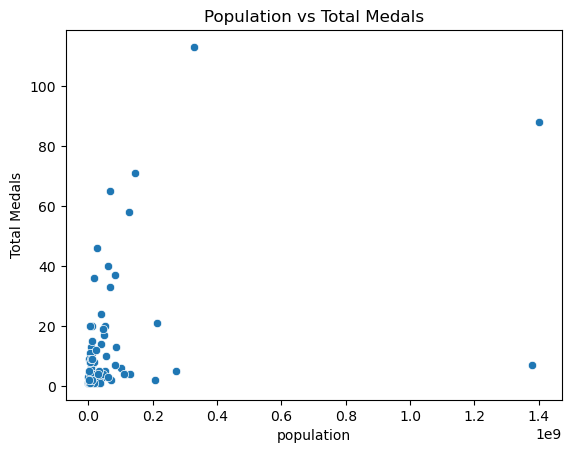

In [22]:
sns.scatterplot(x = data['population'], y = data['total'])
plt.xlabel('population')
plt.ylabel('Total Medals')
plt.title('Population vs Total Medals')
plt.show()

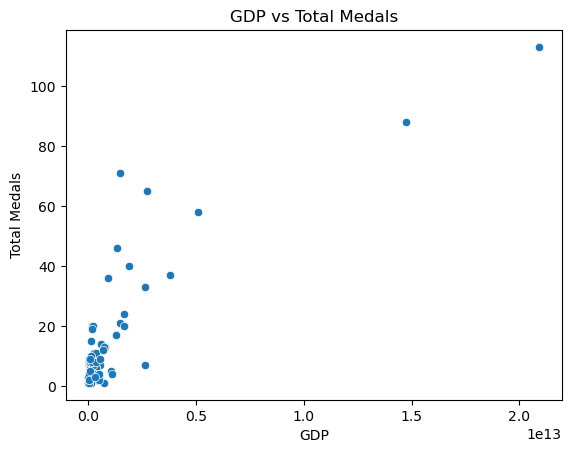

In [24]:
sns.scatterplot(x = data['gdp'], y = data['total'])
plt.xlabel('GDP')
plt.ylabel('Total Medals')
plt.title('GDP vs Total Medals')
plt.show()

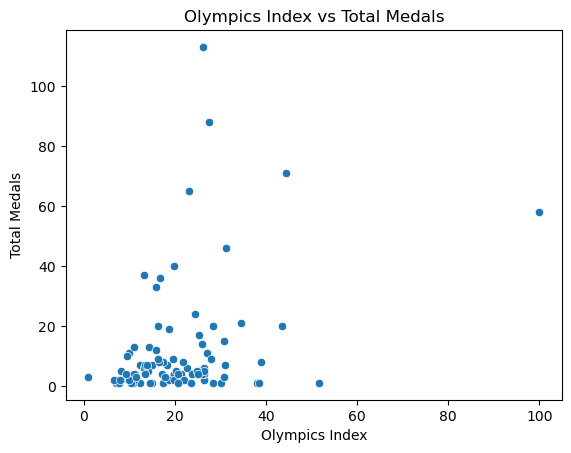

In [26]:
sns.scatterplot(x = data['olympics_index'], y = data['total'])
plt.xlabel('Olympics Index')
plt.ylabel('Total Medals')
plt.title('Olympics Index vs Total Medals')
plt.show()

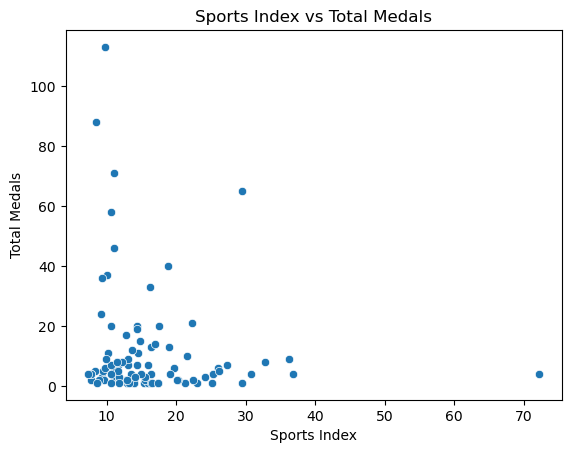

In [28]:
sns.scatterplot(x = data['sports_index'], y = data['total'])
plt.xlabel('Sports Index')
plt.ylabel('Total Medals')
plt.title('Sports Index vs Total Medals')
plt.show()

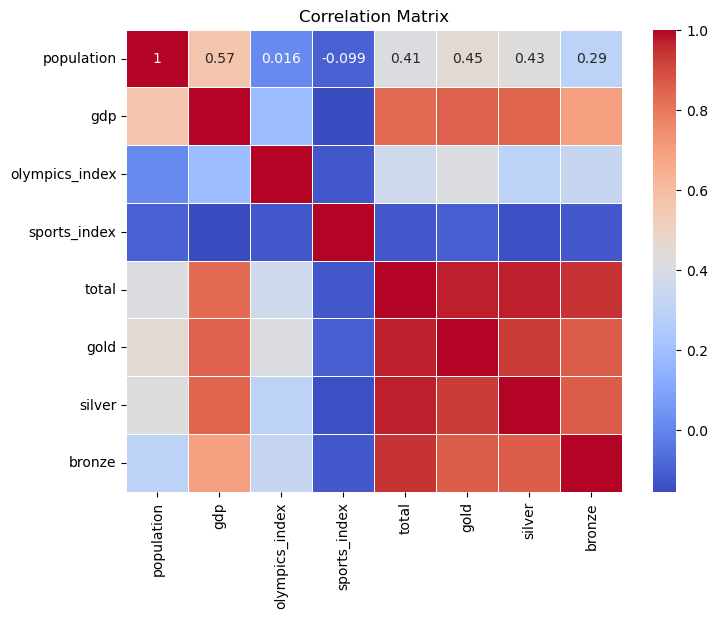

In [30]:
#Visualizing the Data (Correlation Matrix)
corr_matrix = data.corr(numeric_only = True)

#Heatmap of Correlation Matrix
plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

## Step 3: Machine Learning Models

In [33]:
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

#Make Predictions on the Test Set
lr_predict = lr_model.predict(x_test)

#Evaluate
print('Linear Regression Model: ')
print(f'Mean Absolute Error : {mean_absolute_error(y_test, lr_predict)}')
print(f'Mean Squared Error : {mean_squared_error(y_test, lr_predict)}')
print(f'R-Squared : {r2_score(y_test, lr_predict)}')

Linear Regression Model: 
Mean Absolute Error : 1.5426256763212702e-15
Mean Squared Error : 1.22481035284315e-29
R-Squared : 1.0


In [35]:
#Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

#Make Predictions
dt_predict = dt_model.predict(x_test)

#Evaluate
print('Decision Tree Model: ')
print(f'Mean Absolute Error : {mean_absolute_error(y_test, dt_predict)}')
print(f'Mean Squared Error : {mean_squared_error(y_test, dt_predict)}')
print(f'R-Squared : {r2_score(y_test, dt_predict)}')

Decision Tree Model: 
Mean Absolute Error : 3.5789473684210527
Mean Squared Error : 42.73684210526316
R-Squared : 0.9075082132322966


In [37]:
#Random Forest
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)

#Make Predictions
rfr_predict = rfr_model.predict(x_test)

#Evaluate
print('Random Forest Regressor Model: ')
print(f'Mean Absolute Error : {mean_absolute_error(y_test, rfr_predict)}')
print(f'Mean Squared Error : {mean_squared_error(y_test, rfr_predict)}')
print(f'R-Squared : {r2_score(y_test, rfr_predict)}')

Random Forest Regressor Model: 
Mean Absolute Error : 0.7884210526315791
Mean Squared Error : 1.234694736842107
R-Squared : 0.9973278530490876


## Step 4: Deep Learning Models

In [40]:
#General info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   population      93 non-null     int64  
 1   gdp             93 non-null     int64  
 2   olympics_index  93 non-null     float64
 3   sports_index    93 non-null     float64
 4   total           93 non-null     int64  
 5   gold            93 non-null     int64  
 6   silver          93 non-null     int64  
 7   bronze          93 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 5.9 KB


In [42]:
#Data Preprocessing
features = data[['population', 'gdp', 'olympics_index', 'sports_index', 'total', 'gold', 'silver', 'bronze']]

#Scale data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(features)

In [44]:
#Prepare Training Data
def create_sequences(data, seq_length):
    xs, ys = [], []
    
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length][4] 
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 60
x, y = create_sequences(scaled_data, seq_length)

In [46]:
#Split Data Into Training and Test Sets
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [48]:
#Building the Model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
#Training the Model
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0257 - val_loss: 0.0042
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - loss: 0.0203 - val_loss: 0.0020
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0195 - val_loss: 0.0029
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0210 - val_loss: 0.0039
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0224 - val_loss: 0.0037
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0224 - val_loss: 0.0029
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0199 - val_loss: 0.0023
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0191 - val_loss: 0.0020
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0192 - val_loss: 0.0020
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 0.0194 - val_loss: 0.0023
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0186 - val_loss: 0.0025
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0197 - val_lo

In [52]:
#Evaluating the Model
predicted_medals = model.predict(x_test)
predicted_medals = scaler.inverse_transform(np.concatenate((np.zeros((predicted_medals.shape[0], 7)), predicted_medals), axis = 1))[:, 7]

#Inverse transform the actual medals
actual_medals = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], 7)), y_test.reshape(-1, 1)), axis = 1))[:, 7]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


In [54]:
#Calculate Performance Metrics
mae = mean_absolute_error(actual_medals, predicted_medals)
mse = mean_squared_error(actual_medals, predicted_medals)
r2 = r2_score(actual_medals, predicted_medals)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

MSE: 170.48149675824234
MAE: 8.93203161063851
R2: -0.376589078079983
